# Changes occuring in the provision Structured Medications Reviews (SMRs): 09/2020 - 01/2021 

Below are various time-series graphs showing changes in total nationwide SMR provision as well as a breakdown by region and other demographic variables.  The following graphs are available:
* [Total SMR number](#total-smr)
* [Decile chart of rate of SMR by practice](#decile-smr)
* [Rate of SMR by geographical region](#smr-region)
* [Rate of SMR by age group](#smr-age)
* [Rate of SMR by sex](#smr-sex)
* [Rate of SMR by care home status](#smr-care-home)
* [Rate of SMR by recent hospital admission status](#smr-hospital-admission)
* [Rate of SMR by recent falls status](#smr-falls)


#### Methods
Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed coding activity related to SMR in general practice from the beginning of September 2020 until the end of Januray 2021. The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/codelist/opensafely/structured-medication-review-nhs-england/5459205f/#full-list).  For each within the study period, we have calculated the rate at which the code was recorded per 1000 registered patients.

All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely/SRO-smr).

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off errors, click <a href="javascript:code_toggle_err()">here</a>.''')

from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [13]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ebmdatalab import charts
%matplotlib inline


class Measure:
  def __init__(self, id, numerator, denominator, group_by):
    self.id = id
    self.numerator = numerator
    self.denominator = denominator
    self.group_by = group_by

measures = [
    Measure(
        id="smr_by_sex",
        numerator="had_smr",
        denominator="population",
        group_by=["sex"],
    ),

    Measure(
        id="smr_by_region",
        numerator="had_smr",
        denominator="population",
        group_by=["region"],
    ),

    Measure(
        id="smr_by_age_band",
        numerator="had_smr",
        denominator="population",
        group_by=["age_band"],
    ),

    Measure(
        id="smr_by_care_home_status",
        numerator="had_smr",
        denominator="population",
        group_by=["care_home_status"],
    ),

    Measure(
        id="smr_by_falls",
        numerator="had_smr",
        denominator="population",
        group_by=["had_falls_before_smr"],
    ),

    Measure(
        id="smr_by_hospital_admission",
        numerator="had_smr",
        denominator="population",
        group_by=["had_hospital_admission_before_smr"],
    ),

    Measure(
        id="smr_total",
        numerator="had_smr",
        denominator="population",
        group_by=None,
    ),

    Measure(
        id="smr_total_by_practice",
        numerator="had_smr",
        denominator="population",
        group_by=["practice"],
    ),
]


if not os.path.exists('output/figures'):
    os.mkdir('output/figures')



measures_df_sex = pd.read_csv('output/measures/measure_smr_by_sex.csv')
measures_df_region = pd.read_csv(
    'output/measures/measure_smr_by_region.csv')
measures_df_age = pd.read_csv(
    'output/measures/measure_smr_by_age_band.csv')
measures_df_falls = pd.read_csv(
    'output/measures/measure_smr_by_falls.csv')
measures_df_care_home_status = pd.read_csv(
    'output/measures/measure_smr_by_care_home_status.csv')
measures_df_total = pd.read_csv(
    'output/measures/measure_smr_total.csv')
measures_df_total_by_practice = pd.read_csv(
    'output/measures/measure_smr_total_by_practice.csv')
measures_df_hospital_admission = pd.read_csv(
    'output/measures/measure_smr_by_hospital_admission.csv')

# temporary fix for population not working in Measures
measures_df_total = measures_df_total.groupby(
    ['date'])['had_smr', 'population'].sum().reset_index()
measures_df_total['value'] = measures_df_total['had_smr'] / \
    measures_df_total['population']


def to_datetime_sort(df):
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', inplace=True)


to_datetime_sort(measures_df_sex)
to_datetime_sort(measures_df_region)
to_datetime_sort(measures_df_age)
to_datetime_sort(measures_df_total)
to_datetime_sort(measures_df_falls)
to_datetime_sort(measures_df_care_home_status)
to_datetime_sort(measures_df_total_by_practice)
to_datetime_sort(measures_df_hospital_admission)


def redact_small_numbers(df, n, m):
    """
    Takes measures df and converts any row to nana where value of denominator or numerater in measure m equal to 
    or below n
    Returns df of same shape.
    """
    mask_n = df[m.numerator].isin(list(range(0, n+1)))
    mask_d = df[m.denominator].isin(list(range(0, n+1)))
    mask = mask_n | mask_d
    df.loc[mask, :] = np.nan
    return df

redact_small_numbers(measures_df_sex, 10, measures[0])
redact_small_numbers(measures_df_region, 10, measures[1])
redact_small_numbers(measures_df_age, 10, measures[2])
redact_small_numbers(measures_df_care_home_status, 10, measures[3])
redact_small_numbers(measures_df_falls, 10, measures[4])
redact_small_numbers(measures_df_hospital_admission,
                     10, measures[5])
redact_small_numbers(measures_df_total,10, measures[6])


def calculate_rate(df, value_col='had_smr', population_col='population'):
    num_per_thousand = df[value_col]/(df[population_col]/1000)
    df['num_per_thousand'] = num_per_thousand


calculate_rate(measures_df_sex)
calculate_rate(measures_df_age)
calculate_rate(measures_df_region)
calculate_rate(measures_df_total)
calculate_rate(measures_df_falls)
calculate_rate(measures_df_care_home_status)
calculate_rate(measures_df_total_by_practice)
calculate_rate(measures_df_hospital_admission)

#https://github.com/opensafely/hospital-disruption-research/blob/master/analysis/rate_calculations.py


#Remove U/T in sex column
measures_df_sex = measures_df_sex[measures_df_sex['sex'].isin(["F", "M"])]

#Remove default age band
measures_df_age = measures_df_age[~measures_df_age['age_band'].isin(["0"])]

def plot_measures(df, title, filename, column_to_plot, category=False, y_label='Rate per 1000'):

    if category:
        for unique_category in df[category].unique():

            df_subset = df[df[category] == unique_category]

            plt.plot(df_subset['date'], df_subset[column_to_plot], marker='o');
    else:
        plt.plot(df['date'], df[column_to_plot], marker='o');

    plt.ylabel(y_label)
    plt.xlabel('Date')
    plt.xticks(rotation='vertical')
    plt.title(title)

    if category:
        plt.legend(df[category].unique(), bbox_to_anchor=(
            1.04, 1), loc="upper left")

    else:
        pass

    
    plt.clf()


<a id='total-smr'></a>
## Total SMR Number

Total monthly coding activity.

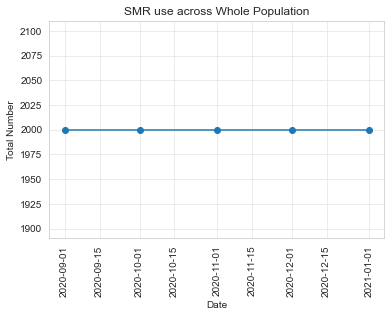

<Figure size 432x288 with 0 Axes>

In [14]:
plot_measures(measures_df_total, 'SMR use across Whole Population',
              'population_rates', 'had_smr', category=False, y_label='Total Number')

<a id='decile-smr'></a>
## SMR by practice

Monthly coding activity rates at the GP practice level.  Each month, the median value and 10-90 percentile activity is shown.

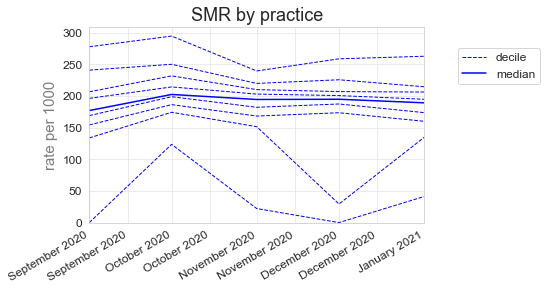

<Figure size 432x288 with 0 Axes>

In [4]:
smr_decile_chart = charts.deciles_chart(
    measures_df_total_by_practice,
    period_column="date",
    column="num_per_thousand",
    title="SMR by practice",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);
plt.show()
plt.clf()


<a id='smr-region'></a>
## SMR breakdown by region

Monthly coding activity rates by geographical region.

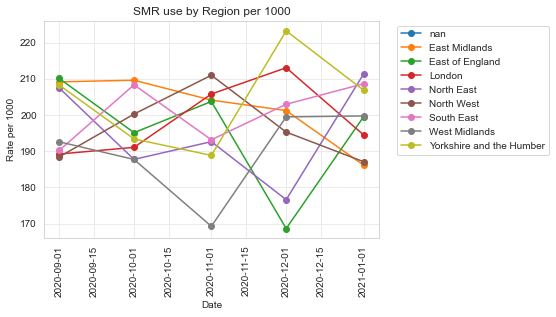

<Figure size 432x288 with 0 Axes>

In [5]:
plot_measures(measures_df_region,
              'SMR use by Region per 1000', 'region_rates', 'num_per_thousand', category='region')


<a id='smr-age'></a>
## SMR breakdown by age band

Monthly coding activity rates by age band.

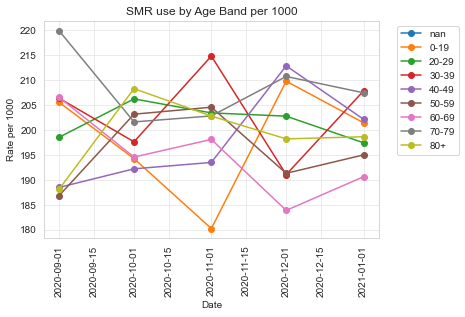

<Figure size 432x288 with 0 Axes>

In [6]:
plot_measures(measures_df_age,
              'SMR use by Age Band per 1000',  'age_rates', 'num_per_thousand', category='age_band')


<a id='smr-sex'></a>
## SMR breakdown by sex

Monthly coding activity rates by sex.

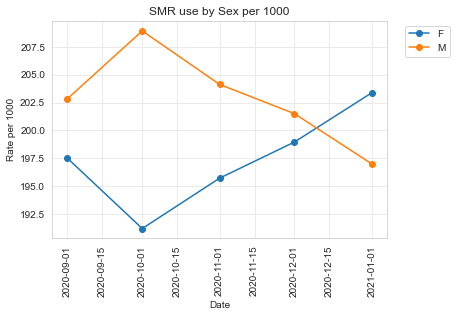

<Figure size 432x288 with 0 Axes>

In [7]:
plot_measures(measures_df_sex,
              'SMR use by Sex per 1000', 'sex_rates', 'num_per_thousand', category='sex', )


## SMR Priority Variables

[This document](https://www.england.nhs.uk/wp-content/uploads/2020/09/SMR-Spec-Guidance-2020-21-FINAL-.pdf) (section 3.1) provides details on those patients that would benefit from SMR and be prioritised.

The below charts are a first look at changes in the rate of provision of SMR according to individual priority variables.  These will need to be further developed into "at risk" categories.

<a id='smr-care-home'></a>
### SMR breakdown by care home status

Monthly coding activity rates by care home status.  Care home status is defined using this  [NHS England Care Homes residential status codelist](https://codelists.opensafely.org/codelist/opensafely/nhs-england-care-homes-residential-status/3712ef13/).

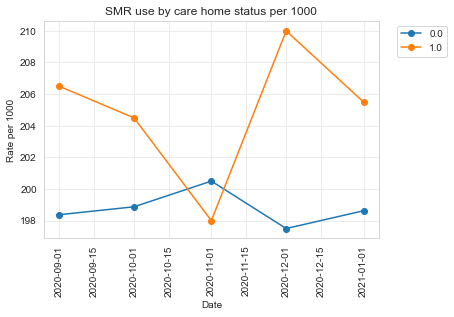

<Figure size 432x288 with 0 Axes>

In [8]:
plot_measures(measures_df_care_home_status,
              'SMR use by care home status per 1000',  'care_home_status_rates', 'num_per_thousand', category='care_home_status')


<a id='smr-hospital-admission'></a>
### SMR breakdown by recent hospitalisation status

Monthly coding activity rates by recent hospital admission.  Here we look at the rate of SMR in those that were discharged from hospital within the prior 3 months vs those that were not.

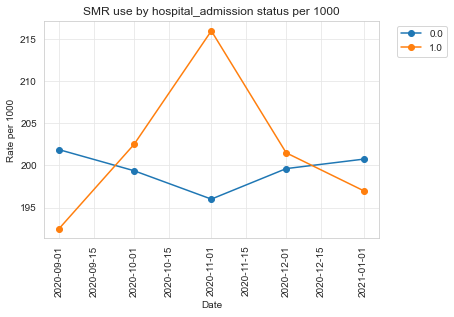

<Figure size 432x288 with 0 Axes>

In [9]:

plot_measures(measures_df_hospital_admission,
              'SMR use by hospital_admission status per 1000',  'hospital_admission_rates', 'num_per_thousand', category='had_hospital_admission_before_smr')


<a id='smr-falls'></a>
### SMR breakdown by recent fall status

Monthly coding activity rates by recent fall status.  Here we look at the rate of SMR in those that had a recorded fall at any point within the prior 3 months vs those that did not.

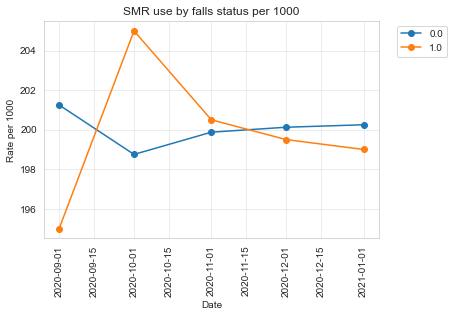

<Figure size 432x288 with 0 Axes>

In [10]:

plot_measures(measures_df_falls,
              'SMR use by falls status per 1000',  'falls_rates', 'num_per_thousand', category='had_falls_before_smr')
